In [31]:
from mis_campos import *

# The 2HDM in the Higgs basis

## The Higgs Sector

In the Higgs basis, only one doublet adquires vev, and are given by 
$$
H_1 = 
\begin{pmatrix}
G^{+} \\
\frac{1}{\sqrt{2}}(v + \phi_1 + i G^0)
\end{pmatrix};
 \qquad 
H_2 = 
\begin{pmatrix}
H^{+} \\
\frac{1}{\sqrt{2}}(\phi_2 + i A)
\end{pmatrix}
$$


In [2]:
h1s, h2s = [{signo:Campo_bosonico_cargado('{{h_{b}^{a}}}'.format(a=signo,b=num)) for signo in ['+','-']} for num in [1,2]]
h1s['+'],h1s['-']
h2s['+'],h2s['-']

h1, h2, h3, h4 = (Campo_bosonico_neutro('h_{a}'.format(a=i)) for i in [1,2,3,4])
h1, h2, h3, h4

a1, a2, a3, a4 = (Campo_bosonico_neutro('a_{a}'.format(a=i)) for i in [1,2,3,4])
a1, a2, a3, a4

u,v = symbols('u,v', real=True)
u,v

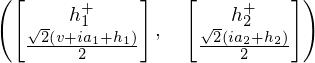

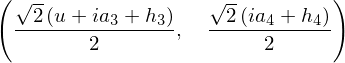

In [3]:
H1 = Rep_gauge([h1s['+'],(S(1)/sqrt(2)*(v + h1 + I*a1))])
H2 = Rep_gauge([h2s['+'],(S(1)/sqrt(2)*(h2 + I*a2))])
H1,H2

S1 = S(1)/sqrt(2)*(u + h3 + I*a3)
S2 = S(1)/sqrt(2)*(h4 + I*a4)
S1,S2

For a CP-conserving Higgs potential, we will have that $h_1$ and $h_3$ will mix, while $a_1$ ($h_1^{+}$) will become the Goldstone boson that gives mass to the $Z$ boson ($W$ boson), while $a_3$ will be part of the massive spectrum too. Impossing an exact $Z_2$ symmetry in the dark scalar sector, will make $h_2$, $a_2$, $h_4$ y $a_4$ stable and tehrefore good dark matter candidates.

## The Higgs Potential

The CP invariant scalar potential takes the following form:

$$
V = -\frac{1}{2}(m_1^2 H_1^{\dagger}H_1 + m_2^2 H_2^{\dagger}H_2) + 
\frac{1}{2}(\lambda_1 (H_1^{\dagger}H_1)^2 + \lambda_2 (H_2^{\dagger}H_2)^2) + 
\lambda_3 (H_1^{\dagger}H_1)(H_2^{\dagger}H_2) + 
\lambda_4 (H_1^{\dagger}H_2)(H_2^{\dagger}H_1) + 
\frac{\lambda_5}{2}((H_1^{\dagger}H_2)^2 + (H_2^{\dagger}H_1)^2) 
-\frac{m_{s1}^2}{2}(S_1^* S_1) -\frac{m_{s2}^2}{2}(S_2^* S_2)
-\frac{\mu_{s1}^2}{2}(S_1^{*2} +  S_1^2) + \lambda_{s1}(S_1^* S_1)^2 + \lambda_{s2}(S_2^* S_2)^2
+ \lambda_{sa}(H_1^{\dagger}H_1)(S_1^* S_1) + \lambda_{sb}(H_1^{\dagger}H_1)(S_2^* S_2)
+ \lambda_{sc}(H_2^{\dagger}H_2)(S_1^* S_1) + \lambda_{sd}(H_2^{\dagger}H_2)(S_2^* S_2)
+ \lambda_{se}(S_1^{\dagger}S_1)(S_2^* S_2) + \lambda_{sf}((S_1^{*}S_2)^2 + (S_2^* S_1)^2)
$$

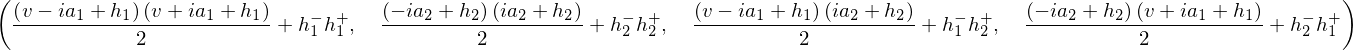

In [4]:
cambios_hs_cargados = {Dagger(h1s['+']):h1s['-'],Dagger(h2s['+']):h2s['-']}

AH11 = (daga(H1)*H1)[0].subs(cambios_hs_cargados)
AH22 = (daga(H2)*H2)[0].subs(cambios_hs_cargados)
AH12 = (daga(H1)*H2)[0].subs(cambios_hs_cargados)
AH21 = (daga(H2)*H1)[0].subs(cambios_hs_cargados)
AH11,AH22,AH12,AH21

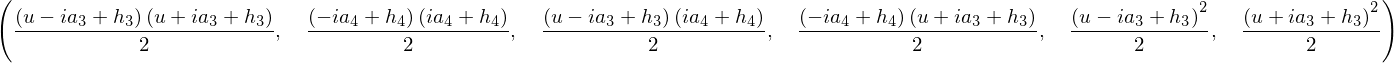

In [5]:
AS11 = Dagger(S1)*S1
AS22 = Dagger(S2)*S2
AS12 = Dagger(S1)*S2
AS21 = Dagger(S2)*S1

S1c2 = Dagger(S1)**2
S12 = S1**2
AS11,AS22,AS12,AS21,S1c2,S12

In [6]:
λ1, λ2, λ3, λ4, λ5 = symbols(r'λ_1, λ_2, λ_3, λ_4, λ_5',real=True)
λ1, λ2, λ3, λ4, λ5
m1,m2,ms1,ms2 = symbols(r'm_1,m_2,m_{s1},m_{s2}',real=True)
m1,m2,ms1,ms2
μs1 = symbols(r'\mu_{s1}',real=True)
μs1
λs1, λs2 = symbols(r'λ_{s1}, λ_{s2}',real=True)
λs1, λs2
λsa, λsb, λsc, λsd, λse,λsf = symbols(r'λ_sa, λ_sb, λ_sc, λ_sd, λ_se,λ_sf',real=True)
λsa, λsb, λsc, λsd, λse,λsf

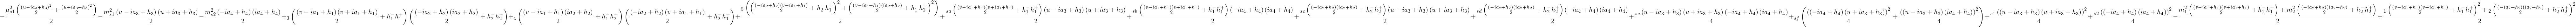

In [7]:
V = -(S(1)/2)*(m1**2*AH11 + m2**2*AH22) + (S(1)/2)*(λ1*AH11**2 + λ2*AH22**2) + λ3*AH11*AH22 + λ4*AH12*AH21 \
+ (λ5/2)*(AH12**2 + AH21**2) - ms1**2*AS11 - ms2**2*AS22 - (μs1**2/2)*(S1c2 + S12) + λs1*AS11**2 + λs2*AS22**2 \
+ λsa*AH11*AS11 + λsb*AH11*AS22 + λsc*AH22*AS11 + λsd*AH22*AS22 + λse*AS11*AS22 + λsf*(AS12**2 + AS21**2)

V

Imposing the minimization conditions for V results in the following relations:

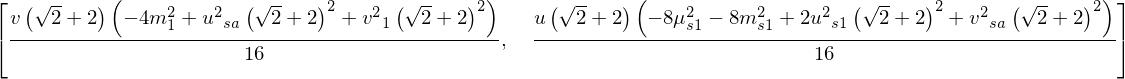

In [8]:
minimo = {h1s['+']:0,h1s['-']:0,h2s['+']:0,h2s['-']:0,h2:0,h4:0,a1:0,a2:0,a3:0,a4:0,h1:v/sqrt(2),h3:u/sqrt(2)}
derivadas = [simplify(V.diff(i).subs(minimo)) for i in [h1,h3]]
derivadas

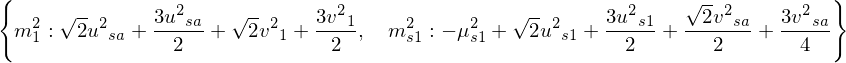

In [9]:
cond_minimo = solve(derivadas,m1**2,ms1**2)
cond_minimo

Because we are considering a CP-invariant potrntial the CP-even (real) and CP-odd (imaginary) components of the mass matrix do not mix.

The mass matrix for the real components in the basis ($h_1$,$h_3$,$h_2$,$h_4$) is given by

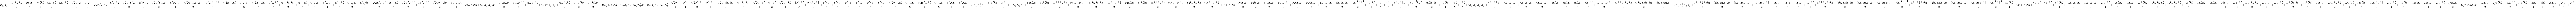

In [10]:
#V = simplify(V.subs(cond_minimo))
all_campos = [h1,h2,h3,h4,a1,a2,a3,a4,h1s['+'],h1s['-'],h2s['+'],h2s['-']]
#all_campos
V = conmutar_campos(V.subs(cond_minimo).expand(),all_campos)
V

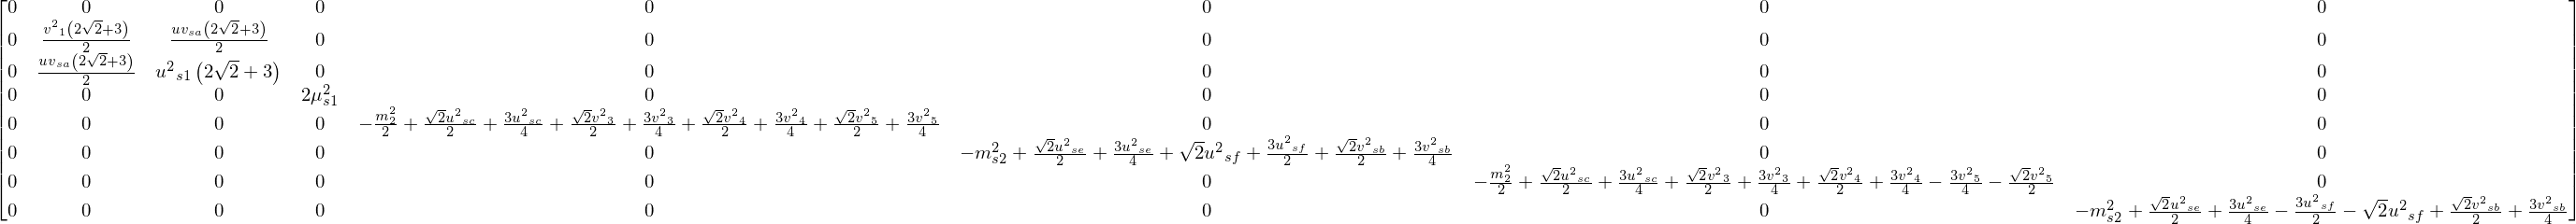

In [27]:
campos = [a1,h1,h3,a3,h2,h4,a2,a4]
Matrizm = Matrix([[simplify(V.diff(a).diff(b).subs(minimo)) for a in campos] for b in campos])
Matrizm

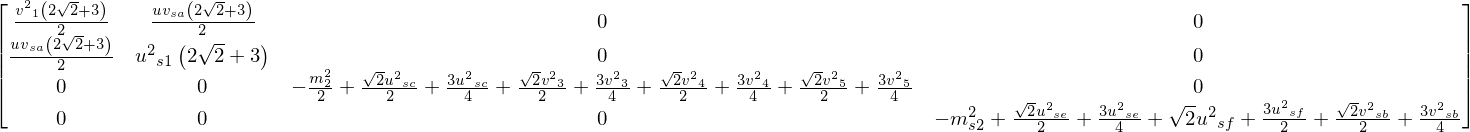

In [11]:
campos_reales = [h1,h3,h2,h4]
masas_reales = Matrix([[simplify(V.diff(a).diff(b).subs(minimo)) for a in campos_reales] for b in campos_reales])
masas_reales

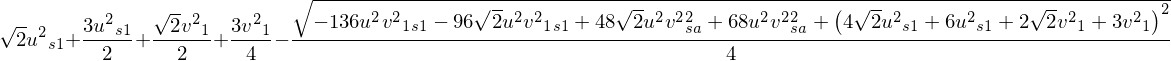

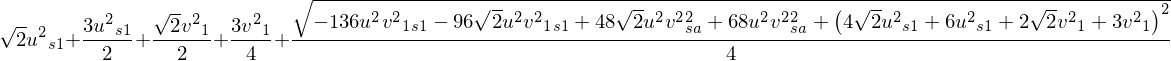

In [12]:
masah, masaH = list(dict.keys(masas_reales[0:2,0:2].eigenvals()))
masah
masaH

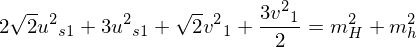

In [13]:
#parametros = 
m = {i:symbols(r'm_{a}'.format(a=i),positive=True) for i in ['h','H','Ha','Hb','A1','A2','A3']}
eq1= Eq(masah + masaH,m['h']**2+ m['H']**2)
eq1

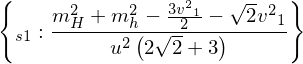

In [14]:
lambdas = solve(eq1,λs1,dict=True)[0]
lambdas

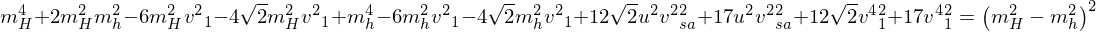

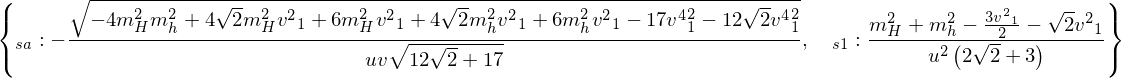

In [15]:
eq2 = Eq(simplify((masaH - masah).subs(lambdas)**2),(m['H']**2- m['h']**2)**2)
eq2
lambdas.update(solve(eq2,λsa,dict=True)[0])
lambdas

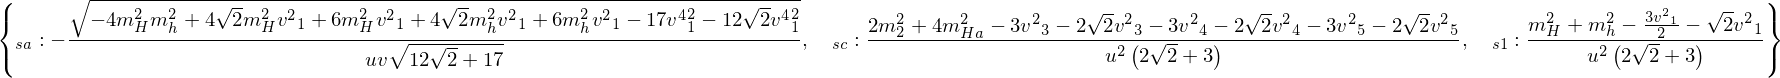

In [16]:
lambdas.update(solve(Eq(masas_reales[2,2].collect([v**2,u**2],factor),m['Ha']**2),λsc,dict=True)[0])
lambdas

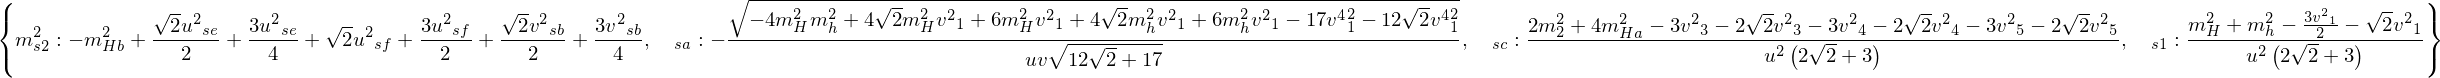

In [17]:
lambdas.update(solve(Eq(masas_reales[3,3].collect([v**2,u**2],factor),m['Hb']**2),ms2**2,dict=True)[0])
lambdas

Thus we see that only $h_1$ y $h_2$ mix, and the mixing angle will be constrained by LHC Higgs data.

\begin{align}
h_1 & = \cos{\alpha} h + \sin{\alpha} H^{0}\\
h_2 & = -\sin{\alpha} h + \cos{\alpha} H^{0}
\end{align}

In what follows we shall identify the mass eigenstates as h as the SM-like Higgs with $m_h = 125$GeV.

On the other hand , the mass matrix for imaginary components, in the basis ($a_1$,$a_3$,$a_2$,$a_4$) reads:

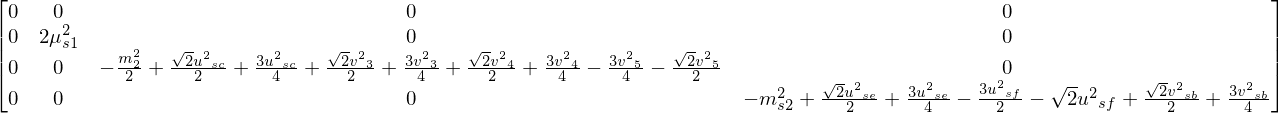

In [18]:
campos_pseudo = [a1,a3,a2,a4]
masas_pseudo = Matrix([[simplify(V.diff(a).diff(b).subs(minimo)) for a in campos_pseudo] for b in campos_pseudo])
masas_pseudo

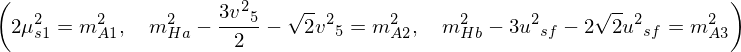

In [19]:
eq1 = Eq(masas_pseudo[1,1],m['A1']**2)
eq2 = Eq(masas_pseudo[2,2].subs({λsc:lambdas[λsc]}).simplify(),m['A2']**2)
eq3 = Eq(masas_pseudo[3,3].subs({ms2**2:lambdas[ms2**2]}).simplify(),m['A3']**2)
eqs = eq1, eq2, eq3
eqs

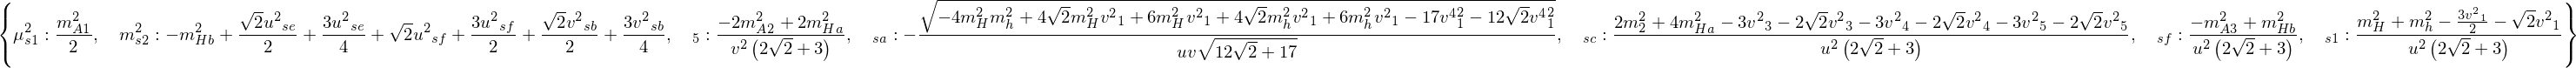

In [20]:
lambdas.update(solve(eqs,μs1**2,λ5,λsf))
lambdas

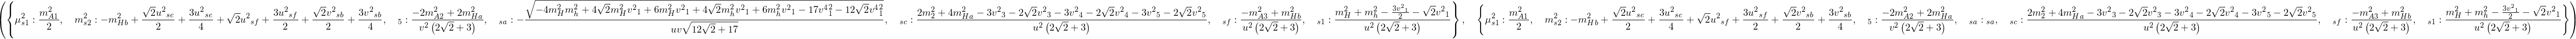

In [21]:
lambdas2 = lambdas.copy()
lambdas2[λsa]=λsa
lambdas,lambdas2

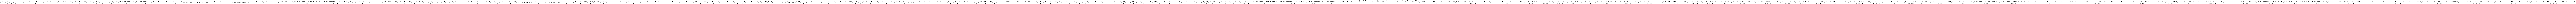

In [22]:
h = Campo_bosonico_neutro(r'h')
H = Campo_bosonico_neutro(r'H')
Ha = Campo_bosonico_neutro(r'H_a')
Hb = Campo_bosonico_neutro(r'H_b')
A1 = Campo_bosonico_neutro(r'A_1')
A2 = Campo_bosonico_neutro(r'A_2')
A3 = Campo_bosonico_neutro(r'A_3')
α = symbols(r'\alpha',real=True)
campos_fis = {h1:cos(α)*h + sin(α)*H,h3:-sin(α)*h + cos(α)*H,
             h2:Ha,h4:Hb,a3:A1,a2:A2,a4:A3}

Vfis = V.subs(campos_fis).subs(lambdas2)
Vfis

#lista_campos_acoplamientos(Vfis.expand())

In [23]:
#lista_campos_acoplamientos(Vfis.expand())
L = lista_campos_acoplamientos(factorizar_campos(Vfis.expand()))
terminos_orden = clasificar_interacciones(L)

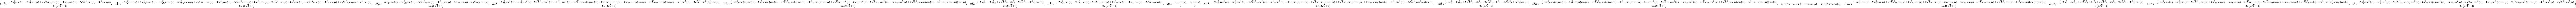

In [24]:
decaimientos_h = [term for term in terminos_orden[3] if term[1].has(h)]
dic_inv(dict(decaimientos_h))